In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [10]:
def gaussian_elimination_with_pivoting(A, f):
    n = len(A)
    U = A.astype(float)  # Convert A to float
    L = np.eye(n, dtype=float)  # Make L a float matrix
    P = np.eye(n, dtype=float)  # Make P a float matrix
    
    # Perform Gaussian elimination with column pivoting
    for k in range(n - 1):
        # Pivot: find the row with the largest element in column k
        i = k + np.argmax(np.abs(U[k:n, k]))
        if U[i, k] == 0:
            raise ValueError("Matrix is singular!")
        
        # Swap rows in U, L, and P
        U[[k, i], k:] = U[[i, k], k:]
        L[[k, i], :k] = L[[i, k], :k]
        P[[k, i]] = P[[i, k]]
        
        # Eliminate entries below pivot
        for j in range(k + 1, n):
            L[j, k] = U[j, k] / U[k, k]
            U[j, k:] -= L[j, k] * U[k, k:]
    
    # Forward substitution with L and P
    Pb = np.dot(P, f)
    y = np.zeros(n)
    for i in range(n):
        y[i] = Pb[i] - np.dot(L[i, :i], y[:i])
    
    # Back substitution with U
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i + 1:], x[i + 1:])) / U[i, i]
    
    return x

# 1. Generate the matrix A based on the given definition
def generate_matrix(n):
    return np.array([[-1 + 2 * max(i + 1, j + 1) for j in range(n)] for i in range(n)], dtype=float)

# Generate vector f such that x_i = 1 for i = 1, ..., n
def generate_vector_f(n):
    A = generate_matrix(n)
    return np.dot(A, np.ones(n)) 

# 2. Generate Hilbert Matrix and corresponding f
def hilbert(n):
    return np.array([[1 / (i + j - 1) for j in range(1,n+1)] for i in range(1,n+1)], dtype=float)

def create_f(n):
    A=hilbert(n)
    f = np.sum(A, axis=1)
    return f

# 3.
def New_metric(n):
    return np.array([[(i-1)**(j-1) for j in range(1,n+1)] for i in range(1,n+1)], dtype=float)

def new_f(n):
    return np.array([(i-1)  for i in range(1,n+1)], dtype=float)

In [12]:
#Example 
A = np.array([[1.0, 3.0, 5.0],[3.0, 3.0, 5.0],[5.0, 5.0, 5.0]])
f= np.array([ 9.0, 11.0, 15.0])
x=gaussian_elimination_with_pivoting(A, f)

print("x:\n", x)


x:
 [1. 1. 1.]


In [3]:
# Testing the function on different matrix sizes
sizes = [10, 20, 50, 100, 200, 1000, 2000]
results = {}
for n in sizes:
    A = generate_matrix(n)
    f = generate_vector_f(n)
    start_time = time.time()
    x = gaussian_elimination_with_pivoting(A, f)
    end_time = time.time()
    elapsed_time = end_time - start_time
    results[n] = {
        'solution': x,
        'time': elapsed_time,
        'accuracy': np.allclose(x, np.ones(n))
    }
    print(f"Size {n}: Time = {elapsed_time:.4f}s, Accurate = {results[n]['accuracy']}")

Size 10: Time = 0.0000s, Accurate = True
Size 20: Time = 0.0000s, Accurate = True
Size 50: Time = 0.0000s, Accurate = True
Size 100: Time = 0.0405s, Accurate = True
Size 200: Time = 0.1744s, Accurate = True
Size 1000: Time = 4.8194s, Accurate = True
Size 2000: Time = 22.6442s, Accurate = True


In [11]:
A=generate_matrix(20000)
#print(A)

In [14]:
# The case n = 2 for Hilbert Matrix.
A=hilbert(2)
f=create_f(2)
x = gaussian_elimination_with_pivoting(A, f)
print("Hilbert matrix:\n", A)
print("f:\n", f)
print("Solution:", x)

Hilbert matrix:
 [[1.         0.5       ]
 [0.5        0.33333333]]
f:
 [1.5        0.83333333]
Solution: [1. 1.]


In [25]:
# Sizes of n to test
sizes = [4, 8, 12, 14, 16, 18, 20, 50, 100]

for n in sizes:
    A= hilbert(n)
    f= create_f(n)
    start_time = time.time()
    x = gaussian_elimination_with_pivoting(A, f)
    end_time = time.time()
    
    #print(f"Size: {n}, Time taken: {end_time - start_time:.4f} seconds")
    print(f"Size: {n} Result: {x}")
    #print(f"Sum of x: {np.sum(x)}, Expected: {n}")  # Check if the sum of x matches expected sum
    print(f"All elements of x close to 1: {np.allclose(x, np.ones(n), rtol=1e-5)}\n")  # Check if x is close to [1, 1, ..., 1]
    #print(f"For n = {n}, solution error (||x - x_true||) is:", np.linalg.norm(x - np.ones(n)))

Size: 4 Result: [1. 1. 1. 1.]
All elements of x close to 1: True

Size: 8 Result: [1.         1.         0.99999997 1.00000019 0.9999995  1.00000071
 0.9999995  1.00000014]
All elements of x close to 1: True

Size: 12 Result: [0.99999992 1.00001055 0.99966921 1.00449489 0.96712745 1.14412506
 0.599208   1.7242071  0.15232742 1.61989835 0.74261685 1.04631526]
All elements of x close to 1: False

Size: 14 Result: [  0.99999982   1.00002236   0.9993485    1.00730747   0.96864192
   0.95793468   2.03861999  -4.04192907  14.41237241 -21.29836392
  24.78610908 -14.86283095   7.03276749   0.        ]
All elements of x close to 1: False

Size: 16 Result: [  1.00000033   0.99994714   1.00209403   0.9640755    1.33173098
  -0.83613577   7.43110685 -13.51030482  21.68235927 -16.18795858
   7.77628709  -1.22207369   7.31134158  -7.5140214    5.7715513
   0.        ]
All elements of x close to 1: False

Size: 18 Result: [ 1.00000005  0.99999367  1.00018163  0.99807578  1.00678927  1.02133711
  0.74

In [34]:
def New_metric(n):
    return np.array([[(i-1)**(j-1) for j in range(1,n+1)] for i in range(1,n+1)], dtype=float)

In [35]:
A=New_metric(5)
print(A)

[[  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


In [32]:
def new_f(n):
    return np.array([(i-1)  for i in range(1,n+1)], dtype=float)

In [33]:
f=new_f(5)
print(f)

[0. 1. 2. 3. 4.]


In [37]:
sizes = range(5,21)

for n in sizes:
    A= New_metric(n)
    f= new_f(n)
    start_time = time.time()
    x = gaussian_elimination_with_pivoting(A, f)
    end_time = time.time()
    
    print(f"Size: {n}, Time taken: {end_time - start_time:.4f} seconds")
    print(f"Result: {x}")

Size: 5, Time taken: 0.0000 seconds
Result: [ 0.  1. -0. -0. -0.]
Size: 6, Time taken: 0.0000 seconds
Result: [ 0.  1. -0. -0. -0.  0.]
Size: 7, Time taken: 0.0000 seconds
Result: [ 0.  1. -0. -0. -0. -0.  0.]
Size: 8, Time taken: 0.0082 seconds
Result: [ 0.  1. -0. -0. -0. -0.  0. -0.]
Size: 9, Time taken: 0.0000 seconds
Result: [ 0.  1. -0.  0. -0.  0.  0.  0. -0.]
Size: 10, Time taken: 0.0000 seconds
Result: [ 0.  1. -0. -0. -0. -0.  0. -0. -0.  0.]
Size: 11, Time taken: 0.0000 seconds
Result: [ 0.  1. -0.  0. -0. -0. -0.  0. -0.  0.  0.]
Size: 12, Time taken: 0.0021 seconds
Result: [ 0.  1. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.]
Size: 13, Time taken: 0.0000 seconds
Result: [ 0.  1. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0.]
Size: 14, Time taken: 0.0036 seconds
Result: [ 0.  1. -0. -0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0.]
Size: 15, Time taken: 0.0012 seconds
Result: [ 0.  1. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.]
Size: 16, Time taken: 0.0020 seconds
Result: [ 0

In [11]:
def matrix_4(n):
    A = np.abs(np.subtract.outer(range(n), range(n)))
    return A


In [19]:
A=matrix_4(10)
print(A)
print(det(A))

[[0 1 2 3 4 5 6 7 8 9]
 [1 0 1 2 3 4 5 6 7 8]
 [2 1 0 1 2 3 4 5 6 7]
 [3 2 1 0 1 2 3 4 5 6]
 [4 3 2 1 0 1 2 3 4 5]
 [5 4 3 2 1 0 1 2 3 4]
 [6 5 4 3 2 1 0 1 2 3]
 [7 6 5 4 3 2 1 0 1 2]
 [8 7 6 5 4 3 2 1 0 1]
 [9 8 7 6 5 4 3 2 1 0]]
(-2304.000000000001, array([[ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 0.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.],
       [ 0.,  0.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.],
       [ 0.,  0.,  0.,  0.,  2.,  4.,  6.,  8., 10., 12.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  4.,  6.,  8., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  6.,  8.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]]))


def matrix_5(n):
    return np.array([[1 if j >= i else -j for j in range(1,n+1)] for i in range(1,n+1)], dtype=float)


In [85]:
A=matrix_5(13)
print(A)
print(det(A))

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.   1.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.  -7.   1.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.   1.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9.   1.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10.   1.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11.   1.   1.]
 [ -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12.   1.]]
6227020800.0


In [12]:
def matrix_6(n):
    A = np.zeros((n, n), dtype=float)
    A[0, :] = A[:, 0] = 1 / n
    for i in range(1, n):
        for j in range(1, n):
            A[i, j] = A[i-1, j] + A[i, j-1]
    return A

In [28]:
A=matrix_6(2)
print(A)
print(det(A))

[[0.5 0.5]
 [0.5 1. ]]
(0.25, array([[0.5, 0.5],
       [0. , 0.5]]))


In [15]:
# Test the determinant function on matrices 4, 5, and 6 for n = 10, 20, 100, 500
sizes = [10, 20, 100, 500]

for n in sizes:
    A_4=matrix_4(n)
    A_5=matrix_5(n)
    A_6=matrix_6(n)

    expected_det_A_4 = (-1)**(n-1) * (n - 1)*2 **(n - 2)
    expected_det_A_5 = factorial(n)
    expected_det_A_6 = n**(-n)
    #print(A)
    #print(det(A))
    
    print(f"n = {n}")
    #print(f"Matrix (4) Determinant: Computed, error = {det(A_4),np.abs(det(A_4)-expected_det_A_4) } ")
    #print(f"Matrix (5) Determinant: Computed, error = {det(A_5),np.abs(det(A_5)-expected_det_A_5)}")
    #print(f"Matrix (6) Determinant: Computed, error = {det(A_6),np.abs(det(A_6)-expected_det_A_6)}\n")
    print(f"Matrix (4)  Determinant: Computed = {det(A_4)[0]}") 
    print(f"Matrix (4)  Determinant: expected = {expected_det_A_4}")
    
    print(f"Matrix (5)  Determinant: Computed = {det(A_5)[0]}")
    print(f"Matrix (5)  Determinant: expected = {expected_det_A_5}")
    print(f"Matrix (6)  Determinant: Computed = {det(A_6)[0]}")
    print(f"Matrix (6)  Determinant: expected = {expected_det_A_6}\n")

n = 10
Matrix (4)  Determinant: Computed = -2304.000000000001
Matrix (4)  Determinant: expected = -2304
Matrix (5)  Determinant: Computed = 3628800.0
Matrix (5)  Determinant: expected = 3628800
Matrix (6)  Determinant: Computed = 1.000000003937687e-10
Matrix (6)  Determinant: expected = 1e-10

n = 20
Matrix (4)  Determinant: Computed = -4980736.000000003
Matrix (4)  Determinant: expected = -4980736
Matrix (5)  Determinant: Computed = 2.43290200817664e+18
Matrix (5)  Determinant: expected = 2432902008176640000
Matrix (6)  Determinant: Computed = 4.701140887841318e-25
Matrix (6)  Determinant: expected = 9.5367431640625e-27

n = 100
Matrix (4)  Determinant: Computed = -3.1374352355648705e+31
Matrix (4)  Determinant: expected = -31374352355648677687043404333056
Matrix (5)  Determinant: Computed = 9.33262154439441e+157
Matrix (5)  Determinant: expected = 933262154439441526816992388562667004907159682643816214685929638952175999932299156089414639761565182862536979208272237582511852109168640000

In [13]:
import numpy as np
from math import factorial

def det(A):
    n = A.shape[0]
    U = A.astype(float)  # Ensure U is float to handle divisions
    sign_change = 1

    for k in range(n - 1):
        # Pivoting for maximal element in column
        max_row = np.argmax(abs(U[k:, k])) + k
        if k != max_row:
            U[[k, max_row], :] = U[[max_row, k], :]
            sign_change *= -1  # Swap rows changes determinant sign

        if abs(U[k, k]) < np.finfo(float).eps:
            return 0  # Singular matrix determinant is zero

        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]
            U[i, k:] -= factor * U[k, k:]

    # The determinant is the product of the diagonal of U, multiplied by the sign change
    determinant = sign_change * np.prod(np.diag(U))
    return determinant, U

    
def log_det(A):
    n = A.shape[0]
    U = A.astype(float)  # Ensure U is float to handle divisions
    sign_change = 1
    log_det_sum = 0  # To store the sum of logs of the diagonal elements

    for k in range(n - 1):
        # Pivoting for maximal element in column
        max_row = np.argmax(abs(U[k:, k])) + k
        if k != max_row:
            U[[k, max_row], :] = U[[max_row, k], :]
            sign_change *= -1  # Swap rows changes determinant sign

        if abs(U[k, k]) < np.finfo(float).eps:
            return 0  # Singular matrix determinant is zero

        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]
            U[i, k:] -= factor * U[k, k:]

    # Sum the logs of the absolute values of the diagonal elements
    log_det_sum = np.sum(np.log(np.abs(np.diag(U))))
    determinant = np.exp(log_det_sum)
    return determinant

# Define matrix (4): ai,j = |i - j|
def matrix_4(n):
    A = np.abs(np.subtract.outer(range(n), range(n)))
    return A

# Define matrix (5): ai,j = 1 if j >= i, -j if j < i

def matrix_5(n):
    return np.array([[1 if j >= i else -j for j in range(1,n+1)] for i in range(1,n+1)], dtype=float)

# Define matrix (6): Recursive matrix with a1,j = aj,1 = n^(-1), ai,j = ai-1,j + ai,j-1 for j >= 2
def matrix_6(n):
    A = np.zeros((n, n), dtype=float)
    A[0, :] = A[:, 0] = 1 / n
    for i in range(1, n):
        for j in range(1, n):
            A[i, j] = A[i-1, j] + A[i, j-1]
    return A

# Test the log determinant function on matrices 4, 5, and 6 for n = 10, 20, 100, 500
sizes = [10, 20, 100, 500]

for n in sizes:
    A4 = matrix_4(n)
    A5 = matrix_5(n)
    A6 = matrix_6(n)

    log_det_A4 = log_det(A4)
    log_det_A5 = log_det(A5)
    log_det_A6 = log_det(A6)

    expected_det_A4 = (-1)**(n-1) * (n - 1)**(2 * n - 2)
    expected_det_A5 = factorial(n)
    expected_det_A6 = n**(-n)

    print(f"n = {n}")
    print(f"Matrix (4) Log Determinant: Computed = {log_det_A4}")
    print(f"Matrix (5) Log Determinant: Computed = {log_det_A5}")
    print(f"Matrix (6) Log Determinant: Computed = {log_det_A6}\n")
    #print(f"Matrix (4) Determinant: Computed, error = {log_det_A4,np.abs(log_det_A4-expected_det_A_4) } ")
    #print(f"Matrix (5) Determinant: Computed, error = {log_det_A5,np.abs(log_det_A5-expected_det_A_5)}")
    #print(f"Matrix (6) Determinant: Computed, error = {log_det_A6,np.abs(log_det_A6-expected_det_A_6)}\n")


n = 10
Matrix (4) Log Determinant: Computed = 2304.000000000001
Matrix (5) Log Determinant: Computed = 3628799.999999996
Matrix (6) Log Determinant: Computed = 1.0000000039376889e-10

n = 20
Matrix (4) Log Determinant: Computed = 4980736.0000000065
Matrix (5) Log Determinant: Computed = 2.43290200817664e+18
Matrix (6) Log Determinant: Computed = 4.701140887841315e-25

n = 100
Matrix (4) Log Determinant: Computed = 3.137435235564875e+31
Matrix (5) Log Determinant: Computed = 9.332621544394755e+157
Matrix (6) Log Determinant: Computed = inf



C:\Users\kjayathi\AppData\Local\Temp\ipykernel_19600\587058904.py:50: RuntimeWarning: overflow encountered in exp
  determinant = np.exp(log_det_sum)


n = 500
Matrix (4) Log Determinant: Computed = 4.083554783350598e+152
Matrix (5) Log Determinant: Computed = inf
Matrix (6) Log Determinant: Computed = inf



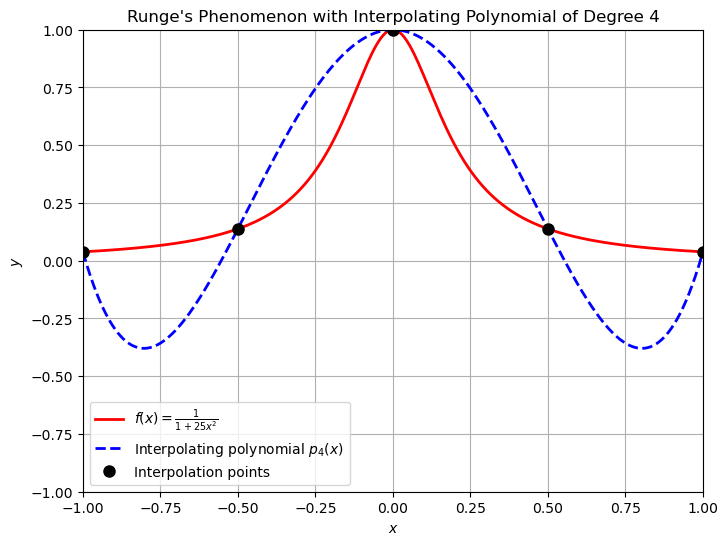

In [2]:
# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Set parameters
N = 4  # Degree of the interpolating polynomial
x_dense = np.linspace(-1, 1, 500)  # Dense grid for plotting the true function and interpolation

# Compute equally spaced grid points x_i and corresponding f(x_i) values
x_nodes = np.linspace(-1, 1, N + 1)  # Equally spaced nodes
y_nodes = f(x_nodes)

# Find the interpolating polynomial coefficients
pN_coefficients = np.polyfit(x_nodes, y_nodes, N)  # Degree N polynomial
pN_values = np.polyval(pN_coefficients, x_dense)  # Evaluate polynomial on dense grid

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_dense, f(x_dense), 'r-', linewidth=2, label='$f(x) = \\frac{1}{1 + 25x^2}$')
plt.plot(x_dense, pN_values, 'b--', linewidth=2, label=f'Interpolating polynomial $p_{{{N}}}(x)$')
plt.plot(x_nodes, y_nodes, 'ko', markersize=8, label='Interpolation points')

# Add labels, legend, and display plot
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'Runge\'s Phenomenon with Interpolating Polynomial of Degree {N}')
plt.legend()
plt.grid(True)
plt.axis([-1, 1, -1, 1])
plt.show()


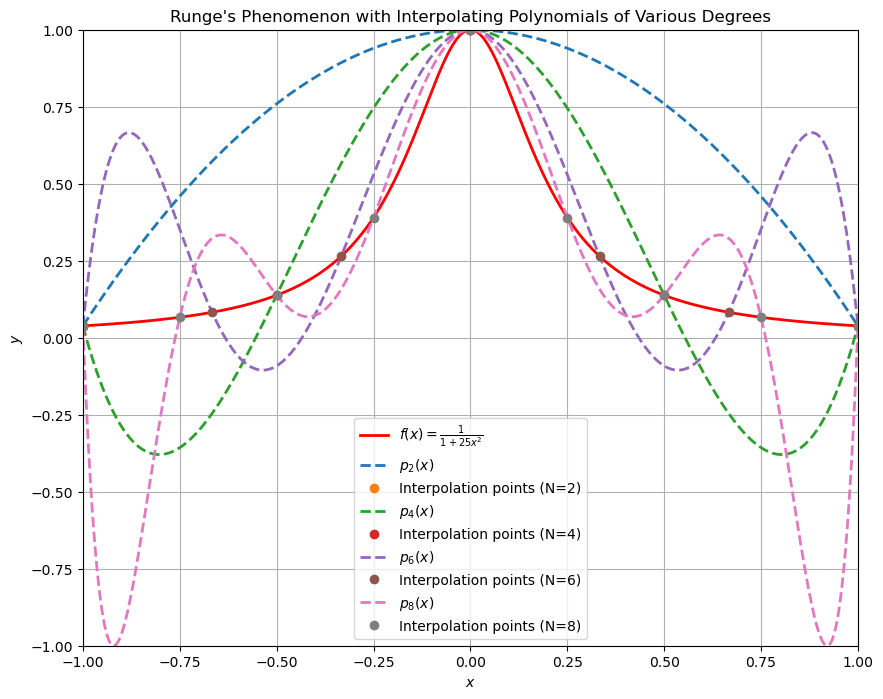

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Set parameters
x_dense = np.linspace(-1, 1, 500)  # Dense grid for plotting the true function and interpolation
N_values = [2, 4, 6, 8]  # Different degrees of the interpolating polynomial

# Plot the true function
plt.figure(figsize=(10, 8))
plt.plot(x_dense, f(x_dense), 'r-', linewidth=2, label='$f(x) = \\frac{1}{1 + 25x^2}$')

# Compute and plot interpolating polynomials for each N in N_values
for N in N_values:
    x_nodes = np.linspace(-1, 1, N + 1)  # Equally spaced nodes for current degree
    y_nodes = f(x_nodes)
    pN_coefficients = np.polyfit(x_nodes, y_nodes, N)  # Degree N polynomial coefficients
    pN_values = np.polyval(pN_coefficients, x_dense)  # Evaluate polynomial on dense grid
    
    # Plot interpolating polynomial for the current degree N
    plt.plot(x_dense, pN_values, '--', linewidth=2, label=f'$p_{{{N}}}(x)$')
    plt.plot(x_nodes, y_nodes, 'o', markersize=6, label=f'Interpolation points (N={N})')

# Add labels, legend, and display plot
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Runge's Phenomenon with Interpolating Polynomials of Various Degrees")
plt.legend()
plt.grid(True)
plt.axis([-1, 1, -1, 1])
# Save the figure
plt.savefig('C:/Users/kjayathi/Documents/conda/conda/interpolating_polynomials.jpg', format='jpg')
plt.show()


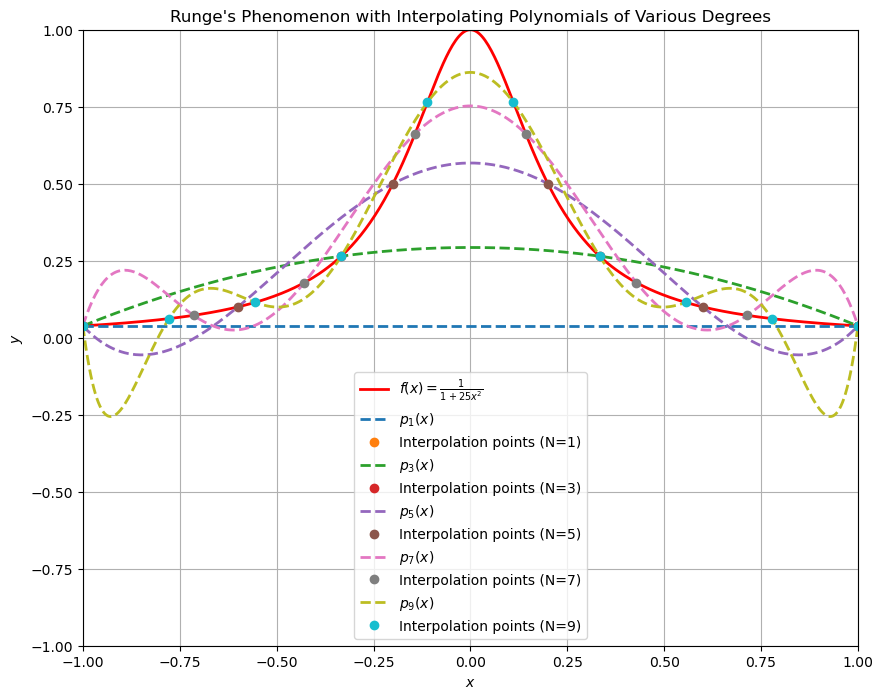

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Set parameters
x_dense = np.linspace(-1, 1, 500)  # Dense grid for plotting the true function and interpolation
N_values = [1, 3, 5, 7,9]  # Different degrees of the interpolating polynomial

# Plot the true function
plt.figure(figsize=(10, 8))
plt.plot(x_dense, f(x_dense), 'r-', linewidth=2, label='$f(x) = \\frac{1}{1 + 25x^2}$')

# Compute and plot interpolating polynomials for each N in N_values
for N in N_values:
    x_nodes = np.linspace(-1, 1, N + 1)  # Equally spaced nodes for current degree
    y_nodes = f(x_nodes)
    pN_coefficients = np.polyfit(x_nodes, y_nodes, N)  # Degree N polynomial coefficients
    pN_values = np.polyval(pN_coefficients, x_dense)  # Evaluate polynomial on dense grid
    
    # Plot interpolating polynomial for the current degree N
    plt.plot(x_dense, pN_values, '--', linewidth=2, label=f'$p_{{{N}}}(x)$')
    plt.plot(x_nodes, y_nodes, 'o', markersize=6, label=f'Interpolation points (N={N})')

# Add labels, legend, and display plot
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Runge's Phenomenon with Interpolating Polynomials of Various Degrees")
plt.legend()
plt.grid(True)
plt.axis([-1, 1, -1, 1])
# Save the figure
plt.savefig('C:/Users/kjayathi/Documents/conda/conda/interpolating_polynomials_odd.jpg', format='jpg')
plt.show()


In [4]:
# Input data
N_values = [2, 4, 6, 8]

for n in N_values:
    x_nodes = np.linspace(-1, 1, n + 1)  # Equally spaced nodes for current degree
    y_nodes = f(x_nodes)
    pN_coefficients = np.polyfit(x_nodes, y_nodes, n)  # Degree N polynomial coefficients
    pN_values = np.polyval(pN_coefficients, x_dense)  # Evaluate polynomial on dense grid
    x = np.array(x_nodes)
    y = np.array(y_nodes)
    # Fit the polynomial
    coefficients = np.polyfit(x, y, n)

    # Display the polynomial in standard form
    poly_str = "P(x) = "
    for i, coef in enumerate(coefficients):
        power = n - i
        if i != 0 and coef >= 0:
            poly_str += " + "
        elif coef < 0:
            poly_str += " - "
            coef = -coef
        poly_str += f"{coef:.5f}x^{power}" if power > 0 else f"{coef:.5f}"

    print(poly_str)


P(x) =  - 0.96154x^2 + 0.00000x^1 + 1.00000
P(x) = 3.31565x^4 - 0.00000x^3 - 4.27719x^2 + 0.00000x^1 + 1.00000
P(x) =  - 13.13489x^6 + 0.00000x^5 + 20.95744x^4 - 0.00000x^3 - 8.78409x^2 + 0.00000x^1 + 1.00000
P(x) = 53.68930x^8 - 0.00000x^7 - 102.81501x^6 + 0.00000x^5 + 61.36721x^4 - 0.00000x^3 - 13.20303x^2 + 0.00000x^1 + 1.00000


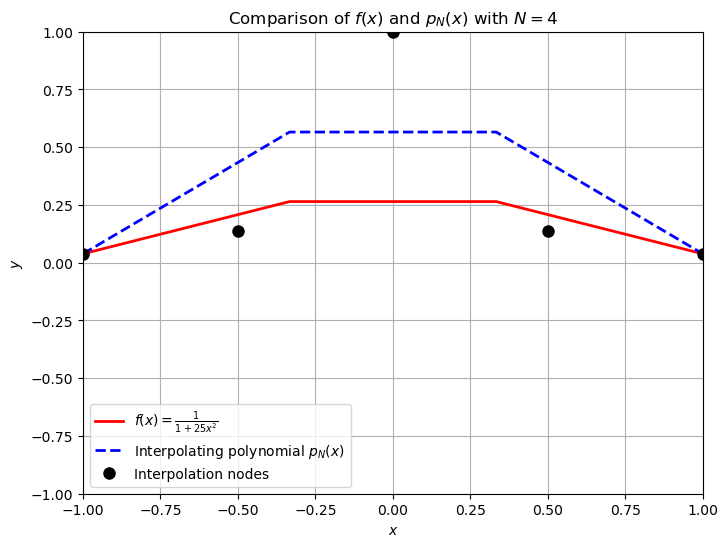

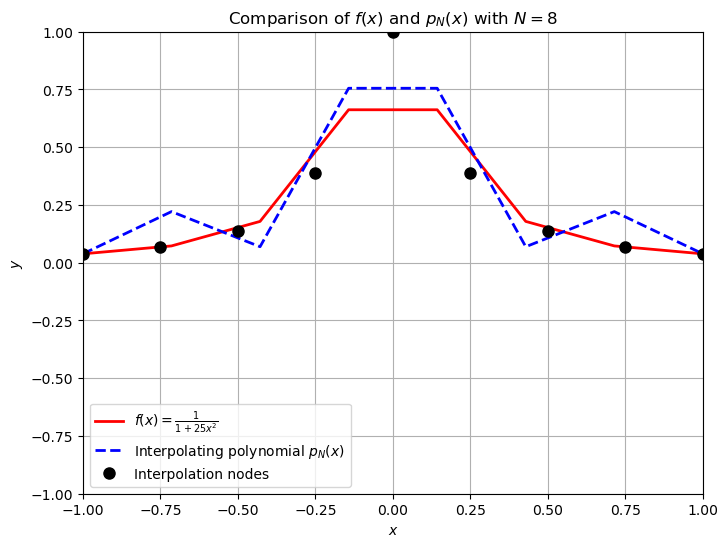

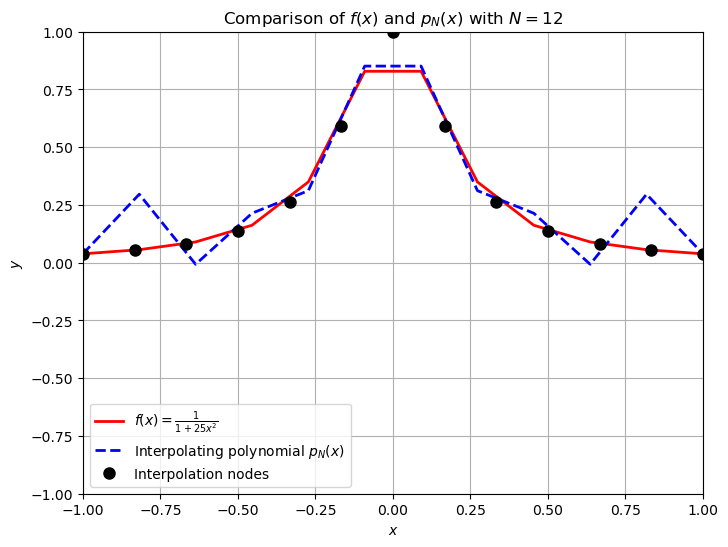

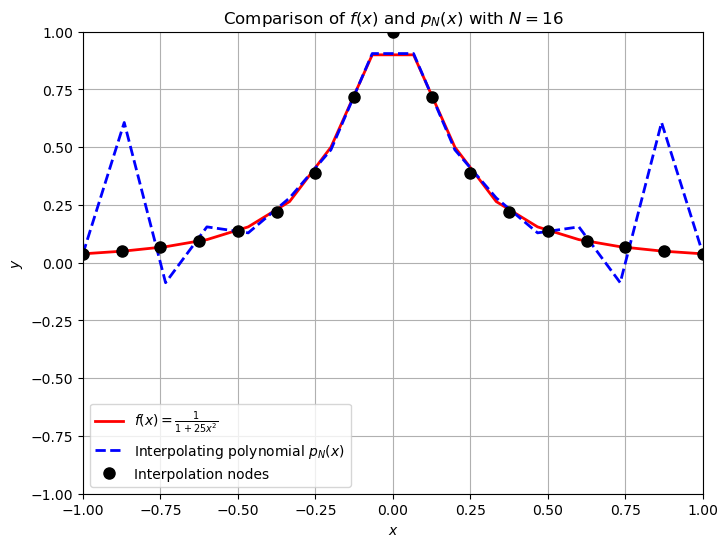

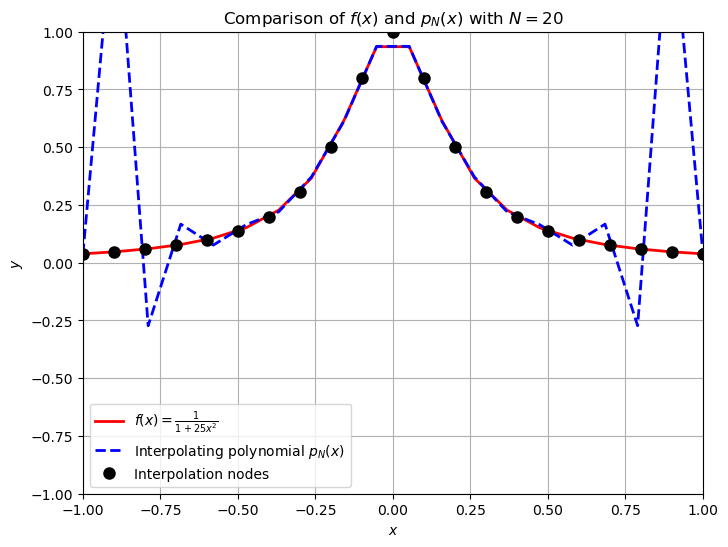

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Parameters
N_values = [2, 4, 6, 8,10]
# Set parameters
x_dense = np.linspace(-1, 1, 500)  # Dense grid for plotting the true function and interpolation
for n in N_values:# Number of interpolation points
    N=2*n
    x_nodes = np.linspace(-1, 1, N + 1)  # N+1 equally spaced points on [-1, 1]
    y_nodes = f(x_nodes)                 # f(x) values at each node

    # Construct Vandermonde matrix A for the interpolation polynomial p_N
    A = np.vander(x_nodes, N + 1, increasing=True)

    # Solve for the coefficients of p_N
    coefficients = np.linalg.solve(A, y_nodes)

    # Generate a finer grid with 2N points for comparison
    x_dense = np.linspace(-1, 1, N)
    f_values = f(x_dense)  # Evaluate f(x) on this finer grid

    # Evaluate the interpolating polynomial p_N on the same grid
    pN_values = np.polyval(coefficients[::-1], x_dense)  # Reverse coefficients for np.polyval

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(x_dense, f_values, 'r-', linewidth=2, label='$f(x) = \\frac{1}{1 + 25x^2}$')
    plt.plot(x_dense, pN_values, 'b--', linewidth=2, label=f'Interpolating polynomial $p_N(x)$')

    # Plot the interpolation nodes for clarity
    plt.plot(x_nodes, y_nodes, 'ko', markersize=8, label='Interpolation nodes')

    # Add labels, legend, and grid
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(f'Comparison of $f(x)$ and $p_{{N}}(x)$ with $N = {N}$')
    plt.legend()
    plt.grid(True)
    plt.axis([-1, 1, -1, 1])

    # Save the plot with a unique filename for each N
    filename = f"comparison_{N}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()


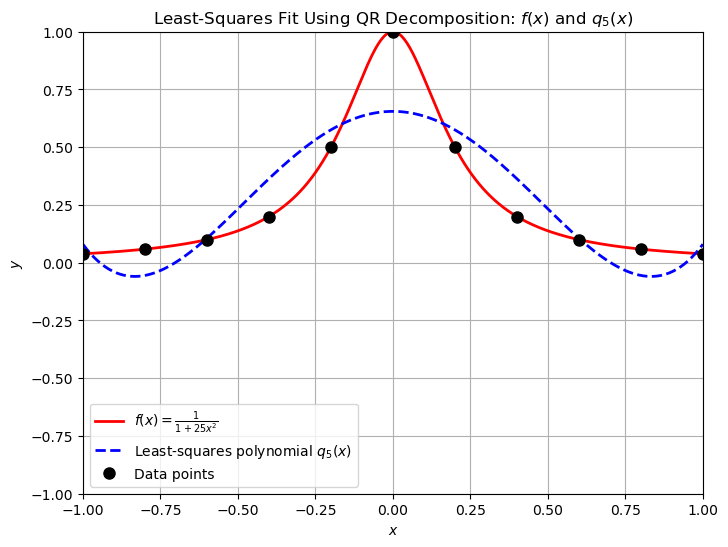

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Parameters
N = 10  # Number of data points
n = 5   # Degree of the least-squares polynomial (must be less than N)

# Generate equally spaced points and function values at those points
x_nodes = np.linspace(-1, 1, N + 1)  # N+1 equally spaced points on [-1, 1]
y_nodes = f(x_nodes)                 # f(x) values at each node

# Construct Vandermonde matrix A
A = np.vander(x_nodes, n+1, increasing=True)

# Perform QR decomposition on A using NumPy
Q, R = np.linalg.qr(A)  # Q, R from A = QR

# Compute Q^T * y
Qt_y = Q.T @ y_nodes

# Solve R * q = Q^T * y for q
q_coefficients = np.linalg.solve(R, Qt_y)

# Evaluate q_n(x) on a dense grid for plotting
x_dense = np.linspace(-1, 1, 500)
qn_values = np.polyval(q_coefficients[::-1], x_dense)  # Reverse coefficients for polyval

# Evaluate f on the same dense grid for comparison
f_values = f(x_dense)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_dense, f_values, 'r-', linewidth=2, label='$f(x) = \\frac{1}{1 + 25x^2}$')
plt.plot(x_dense, qn_values, 'b--', linewidth=2, label=f'Least-squares polynomial $q_{{{n}}}(x)$')
plt.plot(x_nodes, y_nodes, 'ko', markersize=8, label='Data points')

# Add labels, legend, and display plot
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'Least-Squares Fit Using QR Decomposition: $f(x)$ and $q_{{{n}}}(x)$')
plt.legend()
plt.grid(True)
plt.axis([-1, 1, -1, 1])
plt.show()


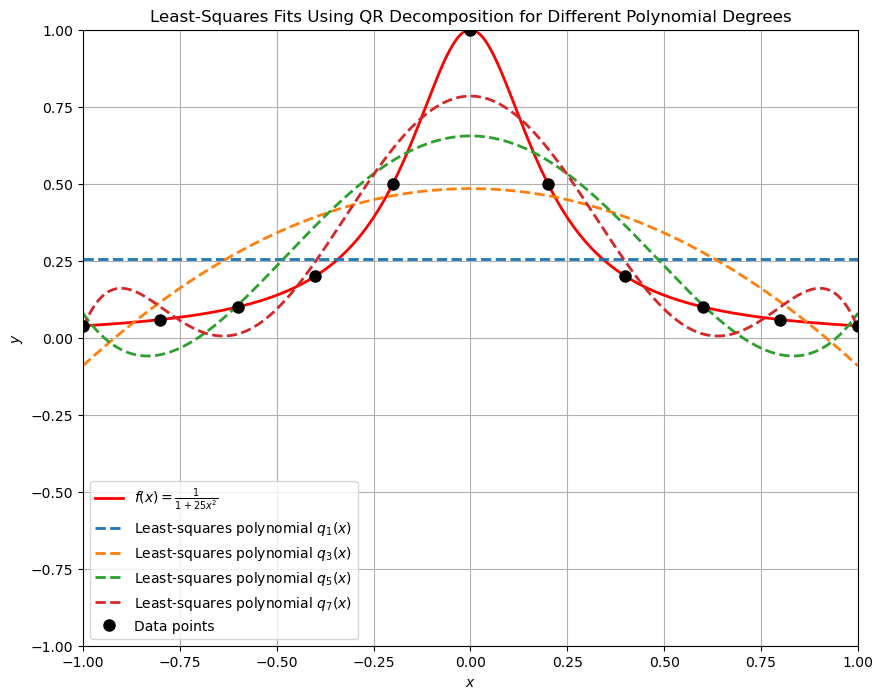

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Parameters
N = 10  # Number of data points
degrees = [1, 3, 5, 7]  # List of polynomial degrees to plot (each must be less than N)

# Generate equally spaced points and function values at those points
x_nodes = np.linspace(-1, 1, N + 1)  # N+1 equally spaced points on [-1, 1]
y_nodes = f(x_nodes)                 # f(x) values at each node

# Evaluate f(x) on a dense grid for plotting
x_dense = np.linspace(-1, 1, 500)
f_values = f(x_dense)

# Plot the original function
plt.figure(figsize=(10, 8))
plt.plot(x_dense, f_values, 'r-', linewidth=2, label='$f(x) = \\frac{1}{1 + 25x^2}$')

# Loop over each degree and compute the least-squares polynomial fit
for n in degrees:
    # Construct Vandermonde matrix A for degree n
    A = np.vander(x_nodes, n + 1, increasing=True)

    # Perform QR decomposition on A
    Q, R = np.linalg.qr(A)  # Q, R from A = QR

    # Compute Q^T * y
    Qt_y = Q.T @ y_nodes

    # Solve R * q = Q^T * y for q
    q_coefficients = np.linalg.solve(R, Qt_y)

    # Evaluate q_n(x) on the dense grid for plotting
    qn_values = np.polyval(q_coefficients[::-1], x_dense)  # Reverse coefficients for polyval

    # Plot the least-squares polynomial for the current degree
    plt.plot(x_dense, qn_values, '--', linewidth=2, label=f'Least-squares polynomial $q_{{{n}}}(x)$')

# Plot the data points
plt.plot(x_nodes, y_nodes, 'ko', markersize=8, label='Data points')

# Add labels, legend, and display plot
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Least-Squares Fits Using QR Decomposition for Different Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.axis([-1, 1, -1, 1])
plt.savefig('C:/Users/kjayathi/Documents/conda/conda/QR_decomposition.jpg', format='jpg')
plt.show()


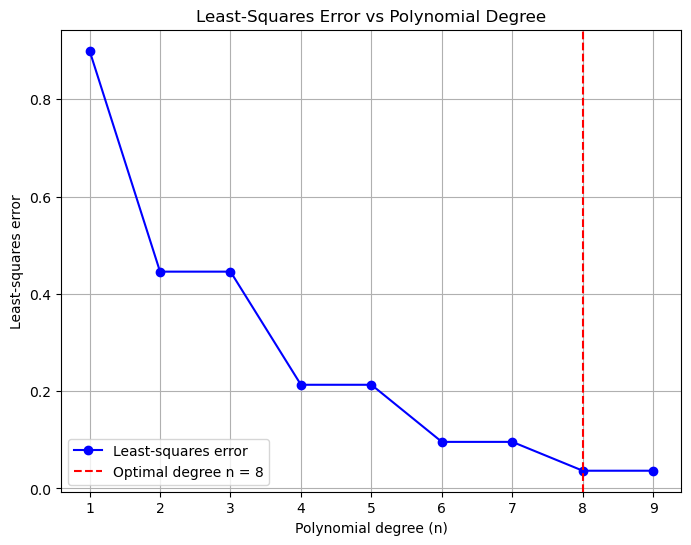

The optimal degree n for least-squares fit is: 8
Minimum least-squares error achieved: 0.03648236431597461


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Parameters
N = 10  # Fix the number of data points (can adjust this if needed)
x_nodes = np.linspace(-1, 1, N + 1)  # N+1 equally spaced points on [-1, 1]
y_nodes = f(x_nodes)                 # f(x) values at each node

# Prepare to store errors for each degree n
errors = []

# Loop over polynomial degrees from 1 to N-1
for n in range(1, N):
    # Construct Vandermonde matrix A for degree n
    A = np.vander(x_nodes, n + 1, increasing=True)

    # Perform QR decomposition using NumPy
    Q, R = np.linalg.qr(A)

    # Compute Q^T * y
    Qt_y = Q.T @ y_nodes

    # Solve R * q = Q^T * y for q
    q_coefficients = np.linalg.solve(R, Qt_y)

    # Evaluate q_n(x) on the nodes to compute error
    qn_values = np.polyval(q_coefficients[::-1], x_nodes)  # Reverse for polyval
    error = np.sum((qn_values - y_nodes) ** 2)  # Least-squares error on nodes
    errors.append(error)  # Store error for degree n

# Identify optimal degree n based on minimum error
optimal_n = np.argmin(errors) + 1  # +1 to match degrees from 1 to N-1

# Plot the error versus polynomial degree
plt.figure(figsize=(8, 6))
plt.plot(range(1, N), errors, 'bo-', label='Least-squares error')
plt.axvline(optimal_n, color='r', linestyle='--', label=f'Optimal degree n = {optimal_n}')
plt.xlabel('Polynomial degree (n)')
plt.ylabel('Least-squares error')
plt.title('Least-Squares Error vs Polynomial Degree')
plt.legend()
plt.grid(True)

# Save the figure as a JPEG
plt.savefig('C:/Users/kjayathi/Documents/conda/conda/error1.jpg', format='jpg')
plt.show()

# Print out the optimal degree and corresponding error
print(f"The optimal degree n for least-squares fit is: {optimal_n}")
print(f"Minimum least-squares error achieved: {errors[optimal_n - 1]}")


In [32]:
def generate_uniform_matrix(m, n):
    """Generate an m x n matrix with entries uniformly distributed in [0, 1]."""
    return np.random.uniform(0, 1, (m, n))

def generate_custom_matrix(m, n):
    """Generate an m x n matrix with entries a_ij = ((2*i - 21)/19)^(j-1)."""
    A = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            A[i, j] = ((2 * (i + 1) - 21) / 19) ** (j)
    return A

def generate_hilbert_matrix(m, n):
    # Code to generate an m x n Hilbert matrix
    H = np.array([[1 / (i + j + 1) for j in range(n)] for i in range(m)])
    return H

In [31]:
def gram_schmidt_qr(A):
    """
    Classical Gram-Schmidt process for QR factorization based on Lemma 5.30.

    Parameters:
    A (numpy.ndarray): Input matrix A of shape (m, n), where m >= n.

    Returns:
    Q (numpy.ndarray): Orthonormal matrix Q of shape (m, n).
    R (numpy.ndarray): Upper triangular matrix R of shape (n, n).
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for i in range(n):
        # Step 1: Start with the i-th column of A
        v = A[:, i]

        # Step 2: Subtract the projection onto each previous vector in Q
        for j in range(i):
            R[j, i] = np.dot(Q[:, j].T, A[:, i])
            v = v - R[j, i] * Q[:, j]

        # Step 3: Set R[i, i] as the norm of the orthogonal component
        R[i, i] = np.linalg.norm(v)

        # Check for linear dependence
        if R[i, i] > np.finfo(float).eps:
            # Normalize to make the vector a unit vector
            Q[:, i] = v / R[i, i]
        else:
            raise ValueError("The columns of A are linearly dependent.")

    return Q, R


In [ ]:
def generate_uniform_matrix(m, n):
    """Generate an m x n matrix with entries uniformly distributed in [0, 1]."""
    return np.random.uniform(0, 1, (m, n))

def generate_custom_matrix(m, n):
    """Generate an m x n matrix with entries a_ij = ((2*i - 21)/19)^(j-1)."""
    A = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            A[i, j] = ((2 * (i + 1) - 21) / 19) ** (j)
    return A

def generate_hilbert_matrix(m, n):
    # Code to generate an m x n Hilbert matrix
    H = np.array([[1 / (i + j + 1) for j in range(n)] for i in range(m)])
    return H

In [47]:
import numpy as np

def gram_schmidt_qr(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for i in range(n):
        v = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j].T, A[:, i])
            v = v - R[j, i] * Q[:, j]
        R[i, i] = np.linalg.norm(v)
        if R[i, i] > np.finfo(float).eps:
            Q[:, i] = v / R[i, i]
        else:
            raise ValueError("The columns of A are linearly dependent.")
    return Q, R

# Case 1: Matrix with entries uniformly distributed over [0, 1]
np.random.seed(0)  # For reproducibility
A1 = generate_uniform_matrix(20,10)
Q1, R1 = gram_schmidt_qr(A1)
Q1_HQ1 = Q1.T @ Q1  # Q^H Q (conjugate transpose)

# Case 2: Matrix with entries a[i, j] = ((2*i - 21) / 19) ** (j - 1)
A2 = generate_custom_matrix(20, 10)
Q2, R2 = gram_schmidt_qr(A2)
Q2_HQ2 = Q2.T @ Q2  # Q^H Q (conjugate transpose)

# Case 3: Hilbert Matrix
A3 = generate_hilbert_matrix(20, 10)
Q3, R3 = gram_schmidt_qr(A3)
Q3_HQ3 = Q3.T @ Q3  # Q^H Q (conjugate transpose)

# Print the results
print("Case 1: Q^H Q for uniformly random matrix A1")
print(Q1_HQ1)
print("\nCase 2: Q^H Q for matrix A2 with entries ((2*i - 21)/19)^(j-1)")
print(Q2_HQ2)
print("\nCase 3: Q^H Q for Hilbert matrix A3")
print(Q3_HQ3)


Case 1: Q^H Q for uniformly random matrix A1
[[ 1.00000000e+00 -2.13317223e-16 -5.11354819e-16 -3.55448977e-16
  -1.80166922e-16  9.70424409e-17  1.37001914e-16 -5.22719321e-16
  -3.43658051e-17  1.39256978e-16]
 [-2.13317223e-16  1.00000000e+00  4.00066419e-16  5.50464042e-16
   2.15293569e-16 -1.72390518e-16 -9.26683229e-17  7.59480935e-16
   9.96097308e-17 -1.90605258e-16]
 [-5.11354819e-16  4.00066419e-16  1.00000000e+00  9.36171843e-16
   5.65697163e-16  3.34812608e-17 -1.12928272e-16  1.00746073e-15
   1.48655427e-16 -2.21133907e-16]
 [-3.55448977e-16  5.50464042e-16  9.36171843e-16  1.00000000e+00
   8.43773588e-17 -1.06311357e-17 -5.57092810e-16  8.03984023e-16
  -2.24573344e-16  2.96947305e-16]
 [-1.80166922e-16  2.15293569e-16  5.65697163e-16  8.43773588e-17
   1.00000000e+00  2.07331757e-17 -1.89871001e-16  3.75520412e-16
  -1.51186685e-16  1.04469140e-16]
 [ 9.70424409e-17 -1.72390518e-16  3.34812608e-17 -1.06311357e-17
   2.07331757e-17  1.00000000e+00  5.53407112e-17 -1.8

In [49]:
import numpy as np

def modified_gram_schmidt_qr(A):
    """
    Modified Gram-Schmidt process for QR factorization.

    Parameters:
    A (numpy.ndarray): Input matrix A of shape (m, n), where m >= n.

    Returns:
    Q (numpy.ndarray): Orthonormal matrix Q of shape (m, n).
    R (numpy.ndarray): Upper triangular matrix R of shape (n, n).
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for i in range(n):
        Q[:, i] = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j].T, Q[:, i])
            Q[:, i] = Q[:, i] - R[j, i] * Q[:, j]

        R[i, i] = np.linalg.norm(Q[:, i])
        if R[i, i] > np.finfo(float).eps:
            Q[:, i] = Q[:, i] / R[i, i]
        else:
            raise ValueError("The columns of A are linearly dependent.")
    
    return Q, R
# Case 1: Matrix with entries uniformly distributed over [0, 1]
np.random.seed(0)  # For reproducibility
A1 = generate_uniform_matrix(20,10)
Q1, R1 = modified_gram_schmidt_qr(A1)
Q1_HQ1 = Q1.T @ Q1  # Q^H Q (conjugate transpose)

# Case 2: Matrix with entries a[i, j] = ((2*i - 21) / 19) ** (j - 1)
A2 = generate_custom_matrix(20, 10)
Q2, R2 = modified_gram_schmidt_qr(A2)
Q2_HQ2 = Q2.T @ Q2  # Q^H Q (conjugate transpose)

# Case 3: Hilbert Matrix
A3 = generate_hilbert_matrix(20, 10)
Q3, R3 = modified_gram_schmidt_qr(A3)
Q3_HQ3 = Q3.T @ Q3  # Q^H Q (conjugate transpose)

# Print the results
print("Case 1: Q^H Q for uniformly random matrix A1")
print(Q1_HQ1)
print("\nCase 2: Q^H Q for matrix A2 with entries ((2*i - 21)/19)^(j-1)")
print(Q2_HQ2)
print("\nCase 3: Q^H Q for Hilbert matrix A3")
print(Q3_HQ3)

Case 1: Q^H Q for uniformly random matrix A1
[[ 1.00000000e+00 -2.13317223e-16 -5.33541395e-16 -3.24774765e-16
  -5.52668316e-17  1.09185505e-16  1.79629643e-16 -4.18876479e-16
  -2.03460198e-16  2.11169334e-17]
 [-2.13317223e-16  1.00000000e+00 -1.88563858e-17  1.16886492e-16
   1.87858270e-19  3.23068527e-17 -1.35260484e-16  2.74996913e-17
   1.13642498e-16 -7.97121049e-17]
 [-5.33541395e-16 -1.88563858e-17  1.00000000e+00  1.48476306e-17
  -7.53581091e-17 -3.97188852e-17 -1.09561972e-16  1.24532854e-16
  -3.31562526e-17  2.61909990e-17]
 [-3.24774765e-16  1.16886492e-16  1.48476306e-17  1.00000000e+00
   7.44994699e-18 -8.16104532e-18 -6.63245833e-17 -3.42535641e-17
  -1.31685148e-17  1.61027102e-16]
 [-5.52668316e-17  1.87858270e-19 -7.53581091e-17  7.44994699e-18
   1.00000000e+00 -3.47779756e-17  2.86560414e-18 -4.88758816e-18
   1.09779534e-17 -4.22328817e-17]
 [ 1.09185505e-16  3.23068527e-17 -3.97188852e-17 -8.16104532e-18
  -3.47779756e-17  1.00000000e+00 -2.22375062e-17 -8.0

In [50]:
import numpy as np

def householder_qr(A):
    """
    QR factorization using Householder reflectors.

    Parameters:
    A (numpy.ndarray): Input matrix A of shape (m, n), where m >= n.

    Returns:
    Q (numpy.ndarray): Orthonormal matrix Q of shape (m, n).
    R (numpy.ndarray): Upper triangular matrix R of shape (n, n).
    """
    m, n = A.shape
    Q = np.eye(m)  # Initialize Q as the identity matrix
    R = A.copy()   # Start with R as A

    for i in range(n):
        # Compute the vector for the Householder reflector
        x = R[i:m, i]
        e1 = np.zeros_like(x)
        e1[0] = np.sign(x[0]) * np.linalg.norm(x)
        v = x + e1
        v = v / np.linalg.norm(v)
        
        # Apply the reflector to R
        R[i:m, i:n] = R[i:m, i:n] - 2 * np.outer(v, np.dot(v.T, R[i:m, i:n]))
        
        # Apply the reflector to Q
        Q[:, i:m] = Q[:, i:m] - 2 * np.outer(Q[:, i:m].dot(v), v)
    
    # Extract the orthogonal matrix Q and the upper triangular matrix R
    return Q[:, :n], R[:n, :]

# Case 1: Matrix with entries uniformly distributed over [0, 1]
np.random.seed(0)  # For reproducibility
A1 = generate_uniform_matrix(20,10)
Q1, R1 = householder_qr(A1)
Q1_HQ1 = Q1.T @ Q1  # Q^H Q (conjugate transpose)

# Case 2: Matrix with entries a[i, j] = ((2*i - 21) / 19) ** (j - 1)
A2 = generate_custom_matrix(20, 10)
Q2, R2 = householder_qr(A2)
Q2_HQ2 = Q2.T @ Q2  # Q^H Q (conjugate transpose)

# Case 3: Hilbert Matrix
A3 = generate_hilbert_matrix(20, 10)
Q3, R3 = householder_qr(A3)
Q3_HQ3 = Q3.T @ Q3  # Q^H Q (conjugate transpose)

# Print the results
print("Case 1: Q^H Q for uniformly random matrix A1")
print(Q1_HQ1)
print("\nCase 2: Q^H Q for matrix A2 with entries ((2*i - 21)/19)^(j-1)")
print(Q2_HQ2)
print("\nCase 3: Q^H Q for Hilbert matrix A3")
print(Q3_HQ3)

Case 1: Q^H Q for uniformly random matrix A1
[[ 1.00000000e+00 -6.61332229e-17  6.73395869e-17 -7.56918950e-17
  -2.59264273e-17  7.20745753e-17  5.60850905e-17 -9.02201088e-17
   6.41133683e-17  1.14373718e-16]
 [-6.61332229e-17  1.00000000e+00 -1.95799430e-17  3.49896423e-17
   9.48154515e-18 -1.19013911e-17  8.23166301e-18 -3.03207210e-17
  -1.83278975e-18  8.35359390e-17]
 [ 6.73395869e-17 -1.95799430e-17  1.00000000e+00 -8.17259818e-17
  -1.76519525e-16  8.70454513e-17 -1.41769831e-16  3.98025847e-17
  -3.32045457e-17  2.38185060e-17]
 [-7.56918950e-17  3.49896423e-17 -8.17259818e-17  1.00000000e+00
   7.44994699e-18 -2.20699434e-17 -7.61949410e-17  5.33062455e-17
   1.60216824e-17  3.32619276e-17]
 [-2.59264273e-17  9.48154515e-18 -1.76519525e-16  7.44994699e-18
   1.00000000e+00  1.78365691e-17 -2.08744226e-17 -1.04786106e-17
   6.33194471e-17 -6.87894207e-17]
 [ 7.20745753e-17 -1.19013911e-17  8.70454513e-17 -2.20699434e-17
   1.78365691e-17  1.00000000e+00 -1.42093294e-17 -8.2